# Detecting Shapes with OpenCV

Learning Outcomes:
* Learn how to load images different ways
* Detect a triangle, pentagon, and more
* Learn more about for loops
* Programming tips and tricks
* Writing text onto an image

Bonus:
* Learn how to write your own function

# 1) Introduction

*Note: This has been adapted from the many links provided in the Links and Disclaimers section (view the Table of Contents on the left).*

What are shapes? They can be boxes, triangles, pentagons and more. Why are they important to detect? Recall that most objects have a general shape. Look at mirror. The human face is almost like an ellipse and the nose can be triangle shaped. If looking at cells, maybe some cells might be more circular normally, and then may change shapes as it moves.

You, the human, can easily identify shapes. But how does a computer identify shapes? Can you even teach a computer to do that? Then that leads to another question: how does our human brain detect shapes? Welcome to programming, where we sometimes try to replicate the complex things our brains do. In doing so, it may reveal how our brains work. Keep that mind as we proceed.

For this notebook, you will learn how to detect shapes by combining the skills you gained throughout all these weeks. We'll start easy: a single triangle. Next, a single pentagon. Then finally, an image with multiple shapes. After you develop the basics, we'll push your knowledge by converting what you know into a reusable function.

> Side note: I've included these side notes that have fun little tidbits of knowledge and wisdom. But since I can go on and on, these are skippable and are not needed to complete the notebook.

Let's get started with loading the libraries for this notebook.

In [ ]:
# Libraries Code Block, always run this before continuing

import cv2
import os

from google.colab.patches import cv2_imshow
from IPython import display
from time import sleep

# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
# 2) Triangle Detection

## a) Load Triangle Image (Google Drive Mount Method)

Skip this section if you already know how to do this. 

First, load the triangle.jpg file from the **SCIP_DATA** and then **Images** folder. If you haven't done so already, download or copy it to your own Google Drive. First, mount it using the code block at the beginning.

Click on the "Files" button on the left (look like a folder), then go to content > drive > MyDrive and browse to the yellowtriangle.jpg file in your folder. Once you get to the image, click on the 3 vertical dots. A small menu will pop-up, then choose "Copy Path". Paste that path in the image_path variable below; after the "=" (equal sign).

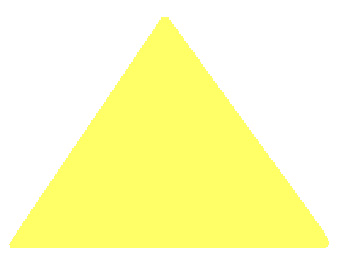

In [ ]:
# Load Triangle Picture

# Replace the path string below with the path to your image.
image_path = '/content/yellowtriangle.jpg'

# Read the image into triangle_image variable. I made sure to keep the color
triangle_image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Show the image to make sure it worked.
cv2_imshow(triangle_image)

Why learn to do this? In your future Google Colab adventures, you will have custom data in your own Google Drive, so it's good to get used to it.


## b) Load Triangle Image (Download Version)

Alternatively, I borrowed this [image](https://www.bananatriangle.com/wp-content/uploads/2011/03/yellowtriangle.jpg) from this [link](https://www.bananatriangle.com/yellowtriangle-jpg/); I used the 240x240 pixels version. Recall from Week 1 on how you downloaded images for the internet. Here's the code for that.

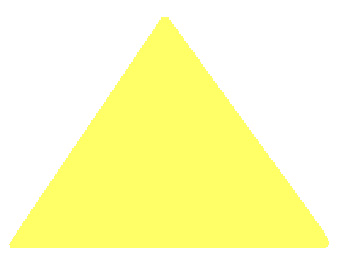

In [ ]:
os.system('curl -O https://www.bananatriangle.com/wp-content/uploads/2011/03/yellowtriangle.jpg')  #this allows you to import any image from the internet

# Load image, note the file name and extension matches the one at the end of the link
triangle_image_2 = cv2.imread("yellowtriangle.jpg", cv2.IMREAD_COLOR)

# Show the image to make sure it worked.
cv2_imshow(triangle_image_2)

Excellent, the triangle image is loaded. Remember all your skills from the previous weeks. We're going to convert the image to grayscale, turn that into a binary image, then find contours on that binary image.

Develop your programmer's intuition (bonus/optional): try to do all the steps up to (and including) the binary image conversion by reviewing your previous work or notebooks.

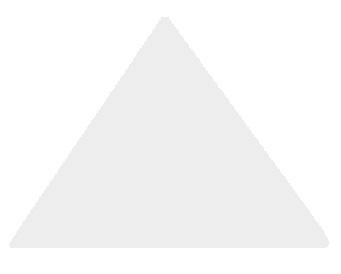

In [ ]:
# Convert image to grayscale
# I'll be using the second triangle image, just in case the first doesn't load up

# Converts triangle_image_2 to grayscale using the cv2.COLOR_BGR2GRAY mode
tri_gray = cv2.cvtColor(triangle_image_2, cv2.COLOR_BGR2GRAY)

# Show the image, is it in grayscale?
cv2_imshow(tri_gray)

The triangle is in grayscale. Here's how to develop your programming intuition: since the triangle is more light gray, where will the threshold lean towards? Black or white? It's okay to get it wrong, intution is developed through experience. Right or wrong, analyze why you made your guess and how you were right or wrong.

This author guesses it is towards white, probably 200. Let's see if that's true. I wrote a for loop to explore which threshold it could be.

thresh: 65


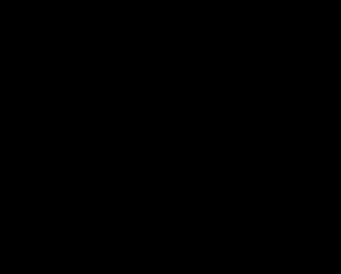

KeyboardInterrupt: ignored

In [ ]:
# Convert grayscale image to binary using threshold

# Since threshold can be from 0 to 255
# Let's start at 0, stop at 255, and step 5 at a time.
# More details on for loops in section (c)
for thresh in range(0, 255, 5):
  
  # Print the thresh value so you, the programmer, can see when the triangle becomes white.
  # Remember, we want our object of interest to be white and the background to black.
  print(f"thresh: {thresh}")

  # Anything above the thresh value will be turned white or 255.
  max_val = 255

  # You have two modes that you learned in this course:
  #  cv2.THRESH_BINARY_INV or cv2.THRESH_BINARY
  # Remember, the background has to be black, so do some trial and error
  # to see which mode causes that.
  ret, binaryIM = cv2.threshold(tri_gray, thresh, max_val, cv2.THRESH_BINARY_INV) # threshold output shown as white

  # Show the image
  cv2_imshow(binaryIM)

  # Wait half (0.5) seconds before showing the next image
  sleep(0.5)

  # Clear the display so you don't get a million images.
  # Also make it wait so the images don't zoom by.
  display.clear_output(wait=True)

# Destory all windows, just in case, and to reduce memory usage.
cv2.destroyAllWindows()

The answer was closer to 255, around 240. This author guessed wrong, and that's okay! By guessing, I gained experience and developed my intuition further. Which means the gray I saw is really close to white.

Next, I'll be covering a little about for loops, if you know all about, skip to the finding contours section.

## c) For Loops, an introduction

You might have seen the for loop in the previous section, saw three numbers, and went, "What am I looking at here?". I'm here to explain that. But before that, what is this range() function all about and why am I writing that "()" afterwards.

The range function actually creates a iterable group of numbers, let's check that out.

In [ ]:
# Create a range from 0 to 5, store in a variable called "temp"
temp = range(0, 5)

# Show the contents of that temp variable.
temp

range(0, 5)

range(0, 5), what does that mean? What's an iterable? In Python, an iterable means a chunk of data that can be stepped through using a for loop. Think of stairs. This temp set of stairs has 5 steps in it, and we will step up them one at a time. Each step has a number attached to it.

So let's put that in a for loop, then print out the number at each step

In [ ]:
# Go through each value in range(0, 5), store that value temporarily in the i variable.
for i in range(0, 5):
  # Print that i number

  # Develop your programmer's intution:
  #  What numbers do you think will show up?
  #  How many numbers will show up?
  print(i)

0
1
2
3
4


So these numbers showed up: 0, 1, 2, 3, 4. And there are 5 numbers. Even though there are 5 numbers, notice how actual number "5" is not in that list. Keep that in mind. Python uses the words "inclusive" and "exclusive". That 5 is exclusive because it is "excluded" or ignored. Very important to know this when writing for loops.

> Side note (You can skip this): Remember, it's okay to get it wrong here. Even after all these years of programming, I still sometimes get my guesses wrong, so I always print out the values to make sure my guess is correct. This teaches me how to "communicate" with a computer, improving my programming skills; one possible related goal is to be able to run test code in your mind before even writing it down, this helps you develop more complex algorithms and solving problems you will run across. You're not going to do this right away, this skill is something you develop over time.

> Side note 2 (You can also skip this): For anyone who has done a sport, music, or developed a skill for a long enough time, you know how it is to visualize an action before actually doing it. This is the same idea, except with programming.

Just like in real stairs, it is possible to skip two steps at a time, so how do you do that? There's a third number you can put the range() function.

In [ ]:
# Go through each value in range(0, 5, 2), store that value temporarily in the i variable.
# Go two steps at a time.
for i in range(0, 5, 2):
  # Print that i number

  # Develop your programmer's intution:
  #  What numbers do you think will show up?
  #  How many numbers will show up?
  print(i)

0
2
4


These numbers showed up: 0, 2, 4. And there are 3. That makes sense. But let's clean the code up a little bit so it is human readable.

In [ ]:
# Create variables so you can read and see what that range() is doing.
start = 0
stop = 5
step = 2   # This is sometimes called increment, use whichever you prefer
for i in range(start, stop, step):
  # Print that i number
  print(i)

Before we refine our threshold observation, play around with the above for loop. Here are some things you can do to improve your intution:

* Try a really big step size that goes beyond the stop, what happens?
* Try a stop value of 100 and step of 10, what happens there?
* Could you add the numbers in this range together? How about multiplication?

For more information, here's a link about the range() function:

https://www.pythoncentral.io/pythons-range-function-explained/

Also, why do I put that () at the end? This my personal shorthand to tell me something is a function. Eventually I'll go from "range() function" to just writing "range()" as you get used to it.

## d) Refining Threshold Loop

Combining what we learned about for loops in section (c) above and that the threshold is around 240, could we refine the for loop to get a more exact value? Here's how to do that. We know the thresh is around 240, but let's go back to 230 as our starting value. Instead of stepping by 5, let's go 1 step at a time. Here's the code, you might have to play around with the start value and run the code a few times.

thresh: 254


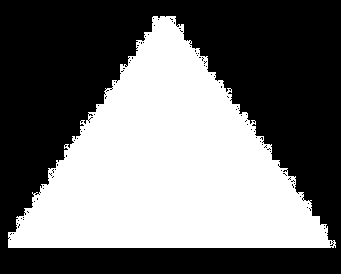

In [ ]:
# Threshold for loop

start = 230
stop = 255
step = 1
for thresh in range(start, stop, step):
  
  # Print the thresh value so you, the programmer, can see when the triangle becomes white.
  # Remember, we want our object of interest to be white and the background to black.
  print(f"thresh: {thresh}")

  # Anything above the thresh value will be turned white or 255.
  max_val = 255

  # You have two modes that you learned in this course:
  #  cv2.THRESH_BINARY_INV or cv2.THRESH_BINARY
  # Remember, the background has to be black, so do some trial and error
  # to see which mode causes that.
  ret, binaryIM = cv2.threshold(tri_gray, thresh, max_val, cv2.THRESH_BINARY_INV) # threshold output shown as white

  # Show the image
  cv2_imshow(binaryIM)

  # Wait half (0.5) seconds before showing the next image
  # Note: You can slow down the playback here.
  sleep(0.5)

  # Clear the display so you don't get a million images.
  # Also make it wait so the images don't zoom by.
  display.clear_output(wait=True)

cv2.destroyAllWindows()

After playing it a few times, it looks like 238 is the number to use. So let's use that. If we don't like it, we can always increase it.

> **Side Note (Skippable)**: No doubt you saw some dots and fuzziness show up. These are artifacts of compression that show up in images, especially in JPG files. Not really noticeable to the human eye unless you enhance it or do image processing. Fun thing you can do: If you have a video streaming service like Netflix, try pausing the video when characters are moving. You will see the compression artifacts. The purpose of this is to reduce the file size of the videos (or image in this case), causing faster video streaming to you, but since human eyes don't really see it, it doesn't ruin your viewing experience. Usually, anyway. I might have ruined it for you now by giving you this knowledge. But this is a skippable side note. Moving on...

Here's the final binary image. I decided on 240 since 238 looked too grainy. Try playing around with different values of thresh and see what you get.

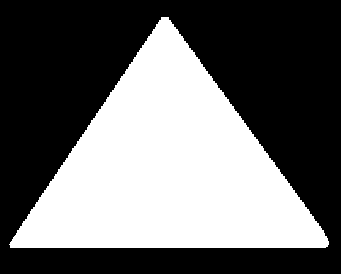

In [ ]:
# Anything above the thresh value will be turned white or 255.
thresh = 240
max_val = 255

# Get Binary Image
ret, binaryIM = cv2.threshold(tri_gray, thresh, max_val, cv2.THRESH_BINARY_INV) # threshold output shown as white

# Show the image
cv2_imshow(binaryIM)


## e) General Object Detection

Now that we have a binary image, let's find the contours and the shape. Triangles have 3 points, so keep that in mind as we proceed.

First, let's see if the triangle is detected first. Then we'll try to detect the shape. Same code as Week 3.

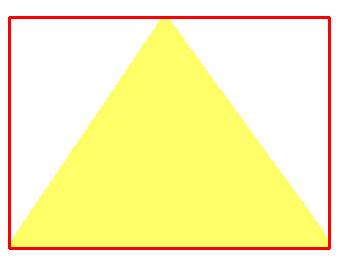

In [ ]:
# Triangle Detection Code

border_color = (0, 0, 255) # For BGR, value between 0 and 255. Red
thick = 2   # thickness of rectangle lines around detected objects

# Make a copy of the triangle image because we will draw on it.
origIM = triangle_image_2.copy()

# Find Contours
contourList, hierarchy = cv2.findContours(binaryIM, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # all countour points, uses more memory

for objContour in contourList:

    # Create a bounding rectangle using the objContour points, store in a list called PO (Points of Object)
    PO = cv2.boundingRect(objContour)

    # Extract the values from PO
    # PO list order: x-origin, y-origin, rectangle width, and rectangle height
    # Origin is the top-left of the rectangle
    x0=PO[0]; y0=PO[1]; w=PO[2]; h=PO[3]

    # Optional: print out the results to see how different they are (uncomment the below line)
    # print(f"x0: {x0}, y0: {y0}, w: {w}, h: {h}")

    # Draw the rectangle on origIM starting at the top-left at (x0,y0) and
    # ending at the bottom right (x0+w,y0+h).
    # Use the red border_color with a thickness of 2 pixels.
    cv2.rectangle(origIM, (x0,y0), (x0+w,y0+h), border_color, thick)

# Show the image, if detected, there should be a red rectangle around the yellow triangle.
cv2_imshow(origIM)


Excellent, so that object was detected. Now let's do shape detection.

## f) Triangle Shape Detection

We'll be using 3 functions. In order to find the shape, we actually need two things.

1. We need the perimeter of the detected object. The [arcLength()](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga8d26483c636be6b35c3ec6335798a47c) function will let us do that. More details in the code, but also in the links in this text block.

2. We need the approximate vertices of the triangle (we're expecting 3 points), the [approxPolyDP()](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga0012a5fdaea70b8a9970165d98722b4c) function does that. It approximates the polygon curves or segment lengths. Here's the [wiki link](https://en.wikipedia.org/wiki/Ramer–Douglas–Peucker_algorithm) on this algorithm. Look at the sample pictures to see what this algorithm is doing.

Finally, for more of a visual effect, we will draw a border on the triangle, this let's us know our algorithm is working correctly and detected a triangle. The [drawContours()](https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html) function let's us do that.

approximations:
[[[  9 244]]

 [[328 241]]

 [[161  17]]]
Length of objContour: 509
Shape Found: Triangle


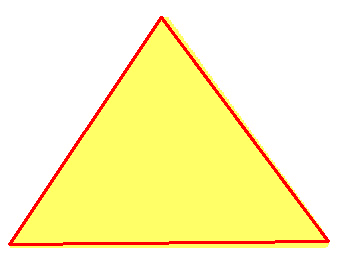

In [ ]:
# Triangle Detection Code

border_color = (0, 0, 255) # For BGR, value between 0 and 255. Red
thick = 2   # thickness of rectangle lines around detected objects

# Make a copy of the triangle image because we will draw on it.
origIM = triangle_image_2.copy()

# Find Contours
contourList, hierarchy = cv2.findContours(binaryIM, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # all countour points, uses more memory

# Initialized a string identifying the detected_shape.
# If our loop/algorithm doesn't work, it will print out "Shape Found: Unknown".
# This is good, that means we have a "fail" condition for our code and let's us know
# if we have to make tweaks. Useful when there are more shapes.
detected_shape = "Unknown"
for objContour in contourList:

    # Use the points of the objContour to find the perimeter,
    # and assumes the shape is closed (a complete polygon)
    object_perimeter = cv2.arcLength(objContour, closed=True)

    # Calculate allowable accuracy of polygon approximations
    # This says that the polygon approximations perimeter can be 1% (0.01) off
    # of the perimeter found with in the objContour.
    # If an exact match is required, make it zero, but you might lower your
    # chances of finding the triangle (definitely play around with it though)
    accuracy = 0.01 * object_perimeter

    # Get the polygon approximation from the objContour within 1% accuracy,
    # and assume it is a closed polygon.
    # If this is a triangle, it will return 3 points of the triangle
    approximations = cv2.approxPolyDP(objContour, accuracy, closed=True)

    # Print out the points of the approximation, notice how there are 3 points
    print(f"approximations:\n{approximations}")

    contour_index = 0
    # For visual confirmation our code is working, draw the contour (or perimeter)
    # of the approximation onto the origIM.
    # Use the red border color with a thickness of 2
    # Notice how the approximations is in a list and the contour_index is 0,
    # This means only use the first element in the list of 1 approximations.
    # Refer to the drawContours link above, you can actually pass it a list of contours.
    cv2.drawContours(origIM, [approximations], contour_index, border_color, thick)

    # If the length of approximations is 3, then it should be a triangle.
    if len(approximations) == 3:
      detected_shape = "Triangle"

    # For comparison, print out the number of items in the objContour
    print(f"Length of objContour: {len(objContour)}")
    # Notice how there are way more than 3 points in there.
    # That is not a simplified version, or approximation, that approxPolyDP() provides.

    # Print what shape we found.
    print(f"Shape Found: {detected_shape}")

# Show the image, if detected, there should be a red rectangle around the yellow triangle.
cv2_imshow(origIM)

It worked! It is slightly off (look at the bottom right area). We detected a triangle, drew the triangle perimeter to show that it worked, and made some print statements.

Here some coding experiments you can do (intuition development):

* Try out different accuracy values. How about a 100% perimeter match? To do 100% match, use multiply by 1.00. For 50%, multiply by 0.50.
* Try changing the border color and thickness. Use previous week's RGB color picker, or practice your Google-Fu. Use keywords: "rgb color picker".
* Make your code crash on purpose, change the contour_index to anything other than 0. What happens? What's the error message and what does it mean? This is a safe way to get comfortable with code crashing, because they will happen.

## g) Writing Text onto the Image

In the future, you're going to get more shapes than just one, so writing the detection result onto the image would let us know if our algorithm is actually working. So for this section, we're going to use the putText() function to do that. Same code as above, except now with text stuff.

approximations:
[[[  9 244]]

 [[328 241]]

 [[161  17]]]
text_loc: (9, 244)
Length of objContour: 509
Shape Found: Triangle


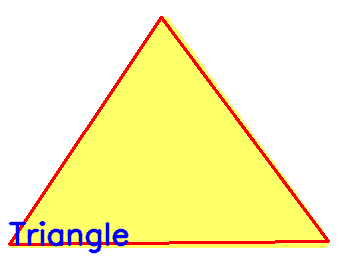

In [ ]:
# Triangle Detection Code with text.

border_color = (0, 0, 255) # For BGR, value between 0 and 255. Yellow
thick = 2   # thickness of rectangle lines around detected objects

# Text on Image Properties
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
text_color = (255, 0, 0) # BGR format, so blue
text_thick = 2
text_linetype = cv2.LINE_AA

# Make a copy of the triangle image because we will draw on it.
origIM = triangle_image_2.copy()

# Find Contours
contourList, hierarchy = cv2.findContours(binaryIM, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # all countour points, uses more memory

# Initialized a string identifying the detected_shape.
# If our loop/algorithm doesn't work, it will print out "Shape Found: Unknown".
# This is good, that means we have a "fail" condition for our code and let's us know
# if we have to make tweaks. Useful when there are more shapes.
detected_shape = "Unknown"
for objContour in contourList:

    # Use the points of the objContour to find the perimeter,
    # and assumes the shape is closed (a complete polygon)
    object_perimeter = cv2.arcLength(objContour, closed=True)

    # Calculate allowable accuracy of polygon approximations
    # This says that the polygon approximations perimeter can be 1% (0.01) off
    # of the perimeter found with in the objContour.
    # If an exact match is required, make it zero, but you might lower your
    # chances of finding the triangle (definitely play around with it though)
    accuracy = 0.01 * object_perimeter

    # Get the polygon approximation from the objContour within 1% accuracy,
    # and assume it is a closed polygon.
    # If this is a triangle, it will return 3 points of the triangle
    approximations = cv2.approxPolyDP(objContour, accuracy, closed=True)

    # Print out the points of the approximation, notice how there are 3 points
    print(f"approximations:\n{approximations}")

    contour_index = 0
    # For visual confirmation our code is working, draw the contour (or perimeter)
    # of the approximation onto the origIM.
    # Use the red border color with a thickness of 2
    # Notice how the approximations is in a list and the contour_index is 0,
    # This means only use the first element in the list of 1 approximations.
    # Refer to the drawContours link above, you can actually pass it a list of contours.
    cv2.drawContours(origIM, [approximations], contour_index, border_color, thick)

    # If the length of approximations is 3, then it should be a triangle.
    if len(approximations) == 3:
      detected_shape = "Triangle"

      # Grab the first approximation, extract the x and y values from it
      # Notice from the print statement of the approximations that it is
      # a list in a list in a list. That's two layers to go through, hence
      # the two 0's
      x, y = approximations[0][0]

      # Put location into a tuple, like how putText() likes it
      text_location = (x, y)
      print(f"text_loc: {text_location}")

      # Draw the text onto the origIM using the detected_shape string,
      # And all the properties we defined at the beginning.
      origIM = cv2.putText(origIM, detected_shape, text_location, font, font_scale, text_color, text_thick, text_linetype)

    # For comparison, print out the number of items in the objContour
    print(f"Length of objContour: {len(objContour)}")
    # Notice how there are way more than 3 points in there.
    # That is not a simplified version, or approximation, that approxPolyDP() provides.

    # Print what shape we found.
    print(f"Shape Found: {detected_shape}")

# Show the image, if detected, there should be a red rectangle around the yellow triangle.
cv2_imshow(origIM)

Perfect, we put text onto the image. This is a very basic version, I leave it to you add your own style to things. Here are some coding experiments you can try out (intuition development):

* Try out different [fonts](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga0f9314ea6e35f99bb23f29567fc16e11) and [LineTypes](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#gaf076ef45de481ac96e0ab3dc2c29a777), refer to the [OpenCV docs](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576) for that.
* Try out different text colors, font_scales, and thickness'.
* See if you can center the text, or put it inside of the triangle.
* In the OpenCV docs, it mentions a bottomLeftOrigin for putText, what happens if you set it to True. Where does the text go?
* Try putting the text at the other vertices found in the approximations, can you access the other points?

For more information on putText(), here are some links to check out:

https://pythonexamples.org/python-opencv-write-text-on-image-puttext/
https://www.geeksforgeeks.org/python-opencv-cv2-puttext-method/
https://www.educba.com/opencv-puttext/

*Note: These are for non-Google CoLab code, so you will have to make some modifications to the code to make it work.

## h) Triangle Detection Conclusion

That was a lot of work just to detect a triangle, you learned how to load images in different ways, learned more about for loops, detecting the triangle, and wrote code to demonstrate that your algorithm is working. Next, we'll do a pentagon. It should go a lot faster since we'll be using all the code from before, but with some changes.

---
# 3) Pentagon Detection

A pentagon has 5 sides or vertices, so that's the new addition we're going to do. Let's do the image processing steps. I'm going to combine it all into one code block.

Image source:

https://commons.wikimedia.org/wiki/File:Regular_polygon_pentagon.svg
https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Regular_polygon_pentagon.svg/252px-Regular_polygon_pentagon.svg.png


Original Image:


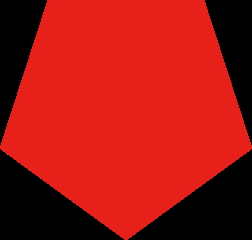

Grayscale Image:


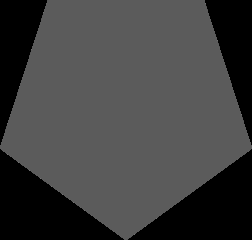

Binary Image:


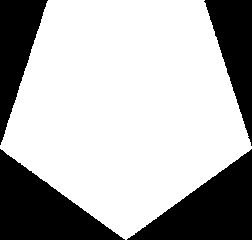

In [ ]:
# Download the image
os.system('curl -O https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Regular_polygon_pentagon.svg/252px-Regular_polygon_pentagon.svg.png')  #this allows you to import any image from the internet

# Load image, note the file name and extension matches the one at the end of the link
pentagon_image = cv2.imread("252px-Regular_polygon_pentagon.svg.png", cv2.IMREAD_COLOR)

# Show the image to make sure it worked.
print("Original Image:")
cv2_imshow(pentagon_image)

# Convert to Grayscale
pentagon_gray = cv2.cvtColor(pentagon_image, cv2.COLOR_BGR2GRAY)

print("Grayscale Image:")
cv2_imshow(pentagon_gray)

# Convert to Binary Image

thresh = 90 # I used a for loop and found the maximum was around 90
max_val = 255

# Notice I'm using cv2.THRESH_BINARY instead of cv2.THRESH_BINARY_INV
ret, pentagon_binary = cv2.threshold(pentagon_gray, thresh, max_val, cv2.THRESH_BINARY) # threshold output shown as white
print("Binary Image:")
cv2_imshow(pentagon_binary)

cv2.destroyAllWindows()

Shape Found: Pentagon


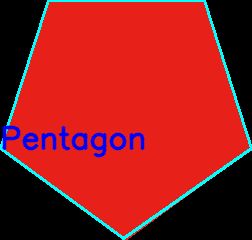

In [ ]:
# Pentagon Detection Code

border_color = (255, 255, 0) # For BGR, value between 0 and 255. Light Blue
thick = 2   # thickness of rectangle lines around detected objects

# Text on Image Properties
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
text_color = (255, 0, 0) # BGR format, so blue
text_thick = 2
text_linetype = cv2.LINE_AA

# Make a copy of the triangle image because we will draw on it.
origIM = pentagon_image.copy()

# Find Contours
contourList, hierarchy = cv2.findContours(pentagon_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # all countour points, uses more memory

# Initialized a string identifying the detected_shape.
# If our loop/algorithm doesn't work, it will print out "Shape Found: Unknown".
# This is good, that means we have a "fail" condition for our code and let's us know
# if we have to make tweaks. Useful when there are more shapes.
detected_shape = "Unknown"
for objContour in contourList:

    # Use the points of the objContour to find the perimeter,
    # and assumes the shape is closed (a complete polygon)
    object_perimeter = cv2.arcLength(objContour, closed=True)

    # Calculate allowable accuracy of polygon approximations
    # This says that the polygon approximations perimeter can be 1% (0.01) off
    # of the perimeter found with in the objContour.
    # If an exact match is required, make it zero, but you might lower your
    # chances of finding the triangle (definitely play around with it though)
    accuracy = 0.01 * object_perimeter

    # Get the polygon approximation from the objContour within 1% accuracy,
    # and assume it is a closed polygon.
    # If this is a triangle, it will return 3 points of the triangle
    approximations = cv2.approxPolyDP(objContour, accuracy, closed=True)

    # Print out the points of the approximation, notice how there are 5 points
    # print(f"approximations:\n{approximations}")

    contour_index = 0
    # For visual confirmation our code is working, draw the contour (or perimeter)
    # of the approximation onto the origIM.
    # Use the red border color with a thickness of 2
    # Notice how the approximations is in a list and the contour_index is 0,
    # This means only use the first element in the list of 1 approximations.
    # Refer to the drawContours link above, you can actually pass it a list of contours.
    cv2.drawContours(origIM, [approximations], contour_index, border_color, thick)

    # ***** CODE CHANGE HERE *****
    # If the length of approximations is 5, then it should be a Pentagon.
    if len(approximations) == 5:
      detected_shape = "Pentagon"

      # Grab the first approximation, extract the x and y values from it
      # Notice from the print statement of the approximations that it is
      # a list in a list in a list.
      # I wanted the coordinates (0, 148), it is the 3 approximation, or the index of 2.
      # ***** CODE CHANGE HERE *****
      x, y = approximations[2][0]

      # Put location into a tuple, like how putText() likes it
      text_location = (x, y)
      # print(f"text_loc: {text_location}")

      # Draw the text onto the origIM using the detected_shape string,
      # And all the properties we defined at the beginning.
      origIM = cv2.putText(origIM, detected_shape, text_location, font, font_scale, text_color, text_thick, text_linetype)

    # For comparison, print out the number of items in the objContour
    # print(f"Length of objContour: {len(objContour)}")
    # Notice how there are way more than 3 points in there.
    # That is not a simplified version, or approximation, that approxPolyDP() provides.

    # Print what shape we found.
    print(f"Shape Found: {detected_shape}")

# Show the image, if detected, there should be a red rectangle around the yellow triangle.
cv2_imshow(origIM)

Now that we're a little more familiar with the coding process, it was a lot faster. Essentially, I copied the old code, put them into two code blocks, and made small changes along the way to get the result I wanted. Those small changes led to the full completed pentagon.

Here some programming experiments you can do:
* Try using the threshold for loop to see what the pentagon looks like with different thresholds.
* Try finding other polygon shapes on the internet (hexagon, rectangle, octagon, and more), or draw your own in a drawing program, then seeing if you can detect that shape in your code.
* Some ideas on where to draw: Paint (Windows); Paintbrush (Mac); or use Google Docs or Slides to draw, take a snapshot of that, then load the image here (refer to section 2a of this notebook).
* You can also use OpenCV to draw shapes, [link here](https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html).

For the next section, we will detect multiple shapes in an image.

---
# 4) Multiple Shapes Detection

We'll be using an image with multiple shapes. [Source: Adrian Rosebrock](https://pyimagesearch.com/2016/02/08/opencv-shape-detection/). It's in the SCIP_DATA folder, so we will be mounting our Google Drive, and loading the image.

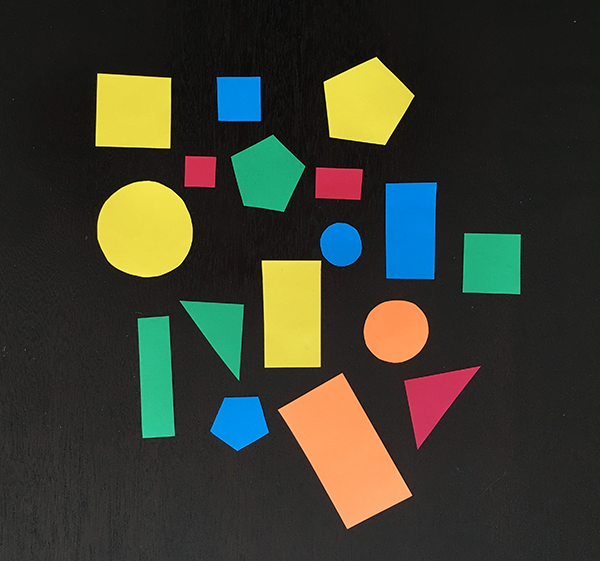

In [41]:
# Replace the path string below with the path to your image.
image_path = "/content/drive/MyDrive/SF State/Dr. Esquerra Lab/Summer 2022/SCIP/Content/shapes.png"

# Read the image into triangle_image variable. I made sure to keep the color
shapes_image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Show the image to make sure it worked.
cv2_imshow(shapes_image)

Grayscale Image:


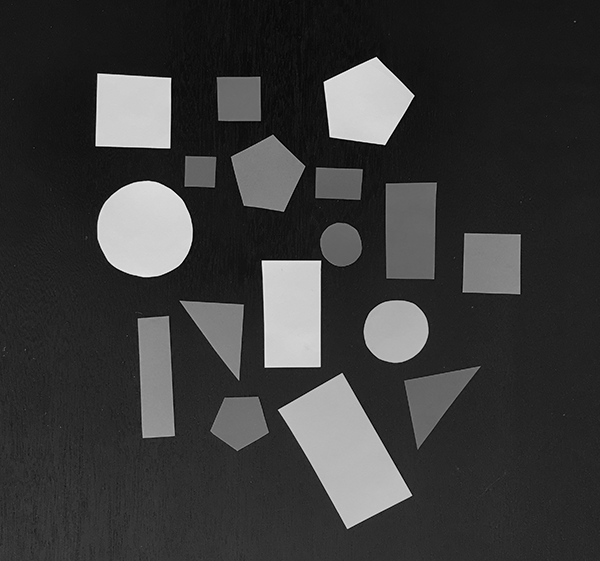

Binary Image:


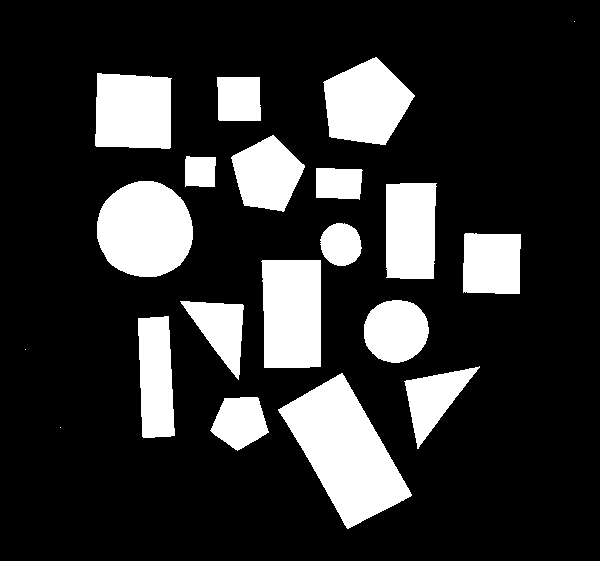

In [47]:
# Image Processing

# Convert to Grayscale
shapes_gray = cv2.cvtColor(shapes_image, cv2.COLOR_BGR2GRAY)

print("Grayscale Image:")
cv2_imshow(shapes_gray)

# Convert to Binary Image

thresh = 90 # I used a for loop and found 90 was pretty good. A coincidence.
max_val = 255

# Notice I'm using cv2.THRESH_BINARY instead of cv2.THRESH_BINARY_INV
ret, shapes_binary = cv2.threshold(shapes_gray, thresh, max_val, cv2.THRESH_BINARY) # threshold output shown as white
print("Binary Image:")
cv2_imshow(shapes_binary)

cv2.destroyAllWindows()

Now for the multiple shapes detection code. Lots of code influences from the links provided in this notebook and at the end. Mostly from Adrian Rosebrock (thank you!). Take note of the sections labeled "# ***** CODE CHANGE HERE *****", this is where I changed the code.

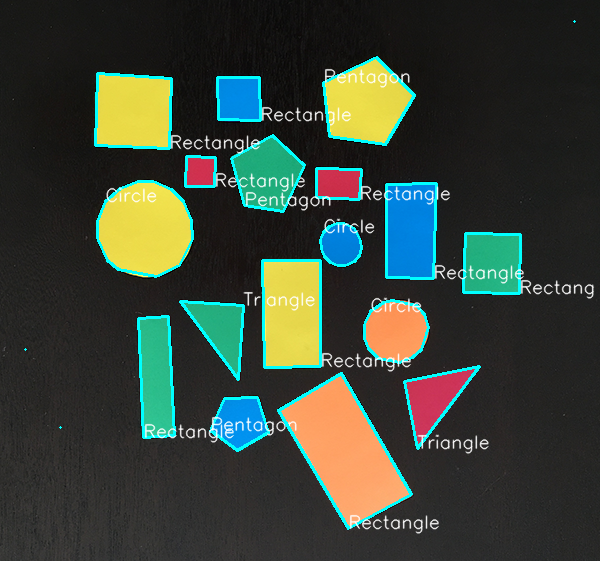

In [68]:
# Multiple Shapes Detection
# Code changes borrowed from Adrian Rosebrock

border_color = (255, 255, 0) # For BGR, value between 0 and 255. Light Blue
thick = 2   # thickness of rectangle lines around detected objects

# Text on Image Properties
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.6
text_color = (255, 255, 255) # BGR format, so blue
text_thick = 1
text_linetype = cv2.LINE_AA

# Make a copy of the triangle image because we will draw on it.
origIM = shapes_image.copy()

# Find Contours
contourList, hierarchy = cv2.findContours(shapes_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # all countour points, uses more memory

# Go through each found contour in contourList
for objContour in contourList:
    # Initialized a string identifying the detected_shape.
    # Default string is "Unknown"
    detected_shape = "Unknown"

    # Use the points of the objContour to find the perimeter,
    # and assumes the shape is closed (a complete polygon)
    object_perimeter = cv2.arcLength(objContour, closed=True)

    # Calculate allowable accuracy of polygon approximations
    # This says that the polygon approximations perimeter can be 1% (0.01) off
    # of the perimeter found with in the objContour.
    # If an exact match is required, make it zero, but you might lower your
    # chances of finding the triangle (definitely play around with it though)
    accuracy = 0.01 * object_perimeter

    # Get the polygon approximation from the objContour within 1% accuracy,
    # and assume it is a closed polygon.
    # If this is a triangle, it will return 3 points of the triangle
    approximations = cv2.approxPolyDP(objContour, accuracy, closed=True)

    # Print out the points of the approximation, notice how there are 5 points
    # print(f"approximations:\n{approximations}")

    contour_index = 0
    # For visual confirmation our code is working, draw the contour (or perimeter)
    # of the approximation onto the origIM.
    # Use the red border color with a thickness of 2
    # Notice how the approximations is in a list and the contour_index is 0,
    # This means only use the first element in the list of 1 approximations.
    # Refer to the drawContours link above, you can actually pass it a list of contours.
    cv2.drawContours(origIM, [approximations], contour_index, border_color, thick)

    # ***** CODE CHANGE HERE *****
    # If/elif/else chain for shape detection
    if len(approximations) == 3:
      detected_shape = "Triangle"
    elif len(approximations) == 4:
      detected_shape = "Rectangle"
    elif len(approximations) == 5:
      detected_shape = "Pentagon"
    elif len(approximations) == 6:
      detected_shape = "Hexagon"
    elif len(approximations) == 7:
      detected_shape = "Heptagon"
    elif len(approximations) == 8:
      detected_shape = "Octagon"
    else:
      # Probably a Circle
      detected_shape = "Circle"
      # Note: Will fail for nonagon shapes (9 sides) and above

    # ***** CODE CHANGE HERE *****
    # If at least 3 vertices detected, must be a shape, so put text on that shape
    # This is repeated in all shapes, so this is a separate
    # if statement that will always be checked.
    if len(approximations) >= 3:
      
      # Grab the first approximation, extract the x and y values from it
      # Notice from the print statement of the approximations that it is
      # a list in a list in a list.
      
      x, y = approximations[2][0]

      # Put location into a tuple, like how putText() likes it
      text_location = (x, y)
      # print(f"text_loc: {text_location}")

      # Draw the text onto the origIM using the detected_shape string,
      # And all the properties we defined at the beginning.
      origIM = cv2.putText(origIM, detected_shape, text_location, font, font_scale, text_color, text_thick, text_linetype)

    # Print what shape we found.
    # print(f"Shape Found: {detected_shape}")
    # Display the updated shapes detected as it goes along
    cv2_imshow(origIM)
    sleep(0.5)
    display.clear_output(wait=True)


We can now detect multiple shapes in an image. I did lots of one-step-at-a-time tweaks to finally reach the current working code. Even then, it has imperfections. It would be better if the text actually showed up in the center and the red and yellow squares (top-left area) was detected as a rectangle; while squares are rectangles, it would be better if they had a separate label. 

That will be part of your coding experiments:
* Detect Squares and Rectangles separately. Hint: Use the [Adrian Rosebrock link](https://pyimagesearch.com/2016/02/08/opencv-shape-detection/).
* Read the Adrian Rosebrock link for creating your own function and class to help with shape detection
* Center the text using moments, also in the link above.
* Figure out how to ignore the 3 dots surrounding the image (hint: Use an if statement to drawContours, maybe borrow another one to do that?)
* Change the text to make it more readable over the yellow color.

Congratulations! You learned how to load images, detected a triangle, pentagon, and then finally all sorts of shapes by working your way up from fundamental concepts. You even learned more about for loops and coding tips and tricks. 

Some biological applications of shape detection includes facial detection (and facial features), cells and organelles detection, and maybe even neuron axon detection (sort of, it's a complicated subject).

This is the end of the core lesson, for those interested in growing your programming skills further, continue!

---
# 5) Creating your own function

This entire course, you've been using functions. Such as cv2.imread() or even range(). But, what is a function? Programming world borrows that term from math world. Broadly speaking, a function is repeatable code that you can call; it has optional inputs and output. Some oversimplified real world examples:

* Cars have inputs of gas and human, then outputs speed and pollution.
* Your frying pan has inputs of heat and uncooked food, then outputs cooked food and dishes to wash.
* You input a key on your keyboard and the output is the character you just pressed.

The concepts of functions are everywhere. Functions allow you to easily automate chunks of codes faster. We're going to start simple, then build a function that downloads images automatically.

Now that you have an idea, let's make a simple function that does a print statement.

In [69]:
# Define (def) a function called "my_function", put a colon at the end
def my_function():
  print("Hello, World!")

# Try running code, nothing will happen. Why? Because the function wasn't called.

In [70]:
# Now call the function.

my_function()

Hello, World!


You are now in programming culture. We tend to use "Hello, World!" as a test case of something new, so that's why you might see that everywhere.

You can even use a function to do math for you, let's make that.

In [71]:
def add_numbers(a, b):
  # Add the numbers a and b, store into the sum variable
  sum = a + b

  # Print the result
  print(sum)

# Let's add 1 + 2, we know the answer should be 3. Let's see if that function works.
add_numbers(1, 2)

3


We can do easy math! Try it out with all sorts of numbers and see what happens.

Having the function add number and printing it, but can it output something? Yes, we can, these are called return statements. So let's change the function to return the sum instead.

In [74]:
# Define the function again, but return sum instead of printing
def add_numbers(a, b):

  # Add a and b, store into the variable sum
  sum = a + b

  # Return the sum variable to whoever called it (you, in this case)
  return sum

# Try adding 2 and 5
add_numbers(2, 5)

# Google CoLab will display the results anyway.

7

Let's store that sum into a variable to see if it will print out.

In [75]:
value = add_numbers(2, 5)

# No output! So the function is not printing anything out

In [76]:
# Now let's print it out:

print(value)

7


In [77]:
# Alternatively, Google CoLab let's you see the contents of variables by just putting the variable below:

value

7

Notice how the value = add_numbers(2, 5) looks similar to other functions you've been using before; it has inputs and an output. Why did I print it outside of the function when I could have just left it inside the function? That's your own personal choice, actually!

Advantage: you can test if your code is actually working by temporarily putting in print statements in your function.

Disadvantage: when working with big chunks of data, having a million print statements may be disorienting when trying to debug or test code, so use it when necessary, learning, and building up code. After testing, consider commenting it until debugging is needed; or if you need to review what your code is doing.

So what happens when you have function with nothing in it? Let's try that out.

In [93]:
# Define a function named "empty_function"

# ****** Uncomment the line below, then run it. ******
# def empty_function():
  # Don't put anything here. Run this code block


# Make sure to re-comment that def line (Ctrl+? hotkey) before continuing, it may cause crashes later.

No matter how experienced you are, you will make this mistake. This still happens to me nowadays, especially when I'm programming late at night and sleep deprived. Mistakes will happen. So how do you prevent this from happening?

You could sleep more, but you can write function "skeletons". A concept I learned a long time ago to make sure my code always works. Here's a function skeleton.

In [81]:
# Define function named "function_skeleton"
def function_skeleton():
  # Put the pass keyword here
  pass

# This is a complete function now. It doesn't do anything, but it will never crash.
# Now you have one less bug to worry about.

Not bad. I still forget it every now and again, but it is usually the first thing I check when my code crashes thanks to the idea of function skeletons.

## a) Download Image Function

Let's make a function that automatically downloads an image for you as long as you give it a valid link. This could be helpful if you like doing stuff like in section 2b.

In [82]:
# Define function named download_image() that takes in a variable called link
def download_image(link):
  
  # Use that link (should be a string) to download the image.
  os.system(f'curl -O {link}')

# Run this Code block so it works for the next code block.

> Side-Note: Notice there is a "f" before the string. This is called string interpolation or f-Strings. I strongly encourage to learn the different string formatting [ways at this link](https://realpython.com/python-string-formatting/); or more directly to the [f-string section](https://realpython.com/python-string-formatting/#3-string-interpolation-f-strings-python-36). People have their own preferences, you will sometimes see the concatenation (use +) method too. Try them all out and see which one you like.

In [85]:
# Let's see if this works, we'll use this link:
# http://www.finecutsugarcraft.com/shop/image/cache/data/Geometric%20Shapes/312.8-207x147.jpg

html_link = "http://www.finecutsugarcraft.com/shop/image/cache/data/Geometric%20Shapes/312.8-207x147.jpg"

download_image(html_link)

# Run this block, then check the Files section to the left to see if it downloaded.
# You should see the file name/extension: 312.8-207x147.jpg

Not bad! But we can do better. How about we extract the file name and automatically load/show the image?

We will parse the string, [more information here](https://pythontect.com/python-parse-string-tutorial/). Since the link tends to have lots of forward slashes ("/"), let's use that to split the link into a list of strings.

In [89]:
# Define function named download_image() that takes in a variable called link
def download_image(link):
  
  # Use that link (should be a string) to download the image.
  os.system(f'curl -O {link}')

  # Extract file name using string parsing

  # Parse link to a list of strings,
  # each element will contain something that was surrounded by a forward slash (/)
  string_list = link.split("/")
  
  # Print the contents
  print(f"string_list: {string_list}")

  # Notice how the last element is always the file name/extension.
  # How do you access the last element of a list? Use -1
  # The next code block will have this.
  # Should make it easier to see certain print statements.


# Test the function right away
html_link = "http://www.finecutsugarcraft.com/shop/image/cache/data/Geometric%20Shapes/312.8-207x147.jpg"

# Call the function using the html_link
download_image(html_link)

string_list: ['http:', '', 'www.finecutsugarcraft.com', 'shop', 'image', 'cache', 'data', 'Geometric%20Shapes', '312.8-207x147.jpg']


Let's get that file name and show the image now:

file_name: 312.8-207x147.jpg


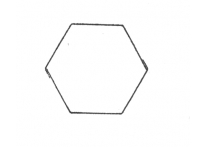

In [91]:
# Define function named download_image() that takes in a variable called link
def download_image(link):
  
  # Use that link (should be a string) to download the image.
  os.system(f'curl -O {link}')

  # Extract file name using string parsing

  # Parse link to a list of strings,
  # each element will contain something that was surrounded by a forward slash (/)
  string_list = link.split("/")
  
  # Print the contents
  # print(f"string_list: {string_list}")

  # Notice how the last element is always the file name/extension.
  # How do you access the last element of a list? Use -1
  file_name = string_list[-1]
  
  # Print the file_name to make sure we extracted it correctly.
  print(f"file_name: {file_name}")

  # Read the image using that file_name,
  # remember that this Notebook remembers it while you are connected.
  # You may need to re-run this again if you close this notebook.
  image = cv2.imread(file_name, cv2.IMREAD_COLOR)

  # Show the image
  cv2_imshow(image)


# Test the function right away
html_link = "http://www.finecutsugarcraft.com/shop/image/cache/data/Geometric%20Shapes/312.8-207x147.jpg"

# Call the function using the html_link
download_image(html_link)

To make automation even better, let's have this function return the image instead of showing it. This should make it easier for re-useability. The rest of the notebook will not see what is inside the function. So if an image is loaded inside the function, the rest of the notebook will NOT see it. This is a programming concept called scope. Scope can get pretty complicated, so check this link out after you're done with this lesson (and after taking a break); [scope link](https://www.w3schools.com/PYTHON/python_scope.asp).

A real-world scope example is something like this. A factory is like a function that made your cell phone, but you don't have access to the factory machinery (you can't make cell phones). You can access their output, the cell phone that you have. This is kind of like scope.

## b) Finished Download Image Function

file_name: 312.8-207x147.jpg


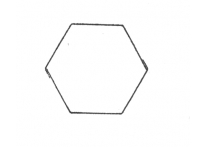

In [92]:
# Updated download_image function
# Define function named download_image() that takes in a variable called link
def download_image(link):
  
  # Use that link (should be a string) to download the image.
  os.system(f'curl -O {link}')

  # Extract file name using string parsing

  # Parse link to a list of strings,
  # each element will contain something that was surrounded by a forward slash (/)
  string_list = link.split("/")
  
  # Print the contents
  # print(f"string_list: {string_list}")

  # Notice how the last element is always the file name/extension.
  # How do you access the last element of a list? Use -1
  file_name = string_list[-1]
  # print(f"file_name: {file_name}")

  # Read the image using that file_name,
  # remember that this Notebook remembers it while you are connected.
  # You may need to re-run this again if you close this notebook.
  image = cv2.imread(file_name, cv2.IMREAD_COLOR)

  return image


# Test the function right away
html_link = "http://www.finecutsugarcraft.com/shop/image/cache/data/Geometric%20Shapes/312.8-207x147.jpg"

# Call the function using the html_link
new_image = download_image(html_link)

# Show the downloaded image to demonstrate the function works and returns an image
cv2_imshow(new_image)

It took a little work, but now you have something that will let you easily download images from the internet and have it ready to be used. Remember, this isn't final, you can always add new code to make it more useful. Here are some ideas you can try out:

* Have the ability to choose between grayscale or color image loading
* Resize the image automatically
* Create a function that does all the image processing for you, and maybe even shows the different threshold/binary images
* See if you can make a function call another function. Useful for more advanced algorithms where a "manager" function is made to direct choices. Something to think about, but don't worry about it for now.
* Create a function that detects shapes for you. Hint: The Rosebrock link has that, but see if you can figure that out on your own.

---
# 6) Conclusion

Take a breather. Congratulate yourself! This is a couple of weeks worth of a computer science coursework. You learned some fundamental programming concepts: for loops and function creation. You learned some challenging image processing techniques with shape detection. This is tough stuff and the beginning (if you choose it) of machine learning algorithms.

---
# Links and Disclaimers

Lesson adapted from:

https://pyimagesearch.com/2016/02/08/opencv-shape-detection/

https://www.educba.com/opencv-approxpolydp/

Other Links and References:

https://www.geeksforgeeks.org/how-to-detect-shapes-in-images-in-python-using-opencv/

https://www.geeksforgeeks.org/python-detect-polygons-in-an-image-using-opencv/

Simple shape detection: https://youtu.be/43pCXboZ5hE
(Explanation is hit-or-miss, but it might be helpful to see someone do it)

Extracting Contours from Images: https://www.youtube.com/watch?v=IG3UkAqHnQI

Using Google CoLab: https://globalaihub.com/blog/how-to-use-google-colab/

Python and Scope: https://www.w3schools.com/PYTHON/python_scope.asp

Random Tips/Tricks of Google CoLab
* There's a Table of Contents to the left
* To comment a line of code, use Ctrl+?. (Windows). Might be Command + ? for Mac.

# Code License Agreement
```
Copyright (c) 2020 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```